In [1]:
from QSVT import *
import matplotlib.pyplot as plt
from qiskit.circuit.random import random_circuit

In [2]:
'''Test Case 1. Odd Degree. Exact Angles'''
P =[0,1,0,2+1j,0,-3-2j]

angles = getAngles(P)
new_angles = get_new_angles(angles)

In [3]:
x_list = np.linspace(-1,1)

W_output = []
R_output = []
for x in x_list:
    W_output.append(Operator(QSP_Wcircuit(angles,x)).data[0][0])
    R_output.append(Operator(QSP_Rcircuit(new_angles,x)).data[0][0])

W_output = np.array(W_output)
R_output = np.array(R_output)

Text(0.5, 1.0, 'QSP R Output')

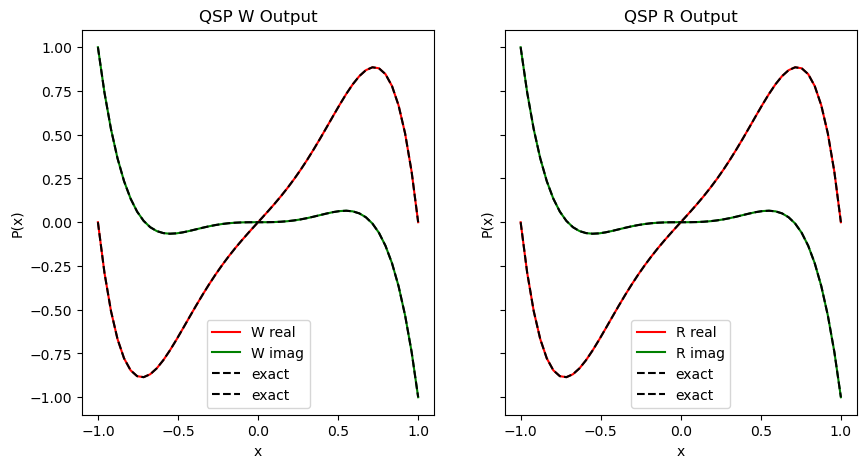

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True,figsize=(10,5))
ax1.plot(x_list,W_output.real,'-', color='red',label='W real')
ax1.plot(x_list,W_output.imag,'-', color='green',label='W imag')
ax1.plot(x_list,np.polynomial.Polynomial(P)(x_list).real,'--', color='black',label='exact')
ax1.plot(x_list,np.polynomial.Polynomial(P)(x_list).imag,'--', color='black',label='exact')
ax1.legend()
ax1.set_xlabel('x')
ax1.set_ylabel('P(x)')
ax1.set_title('QSP W Output')

ax2.plot(x_list,R_output.real,'-', color='red',label='R real')
ax2.plot(x_list,R_output.imag,'-', color='green',label='R imag')
ax2.plot(x_list,np.polynomial.Polynomial(P)(x_list).real,'--', color='black',label='exact')
ax2.plot(x_list,np.polynomial.Polynomial(P)(x_list).imag,'--', color='black',label='exact')
ax2.legend()
ax2.set_xlabel('x')
ax2.set_ylabel('P(x)')
ax2.set_title('QSP R Output')

In [5]:
l=[]
for i in range(100):
    k=np.random.randint(3,8)
    circ = random_circuit(k, 10)
    left_rank =np.random.randint(1,2**k+1)
    right_rank =np.random.randint(1,2**k+1)
    
    
    U =  Operator(circ.reverse_bits()).data
    A = U[0:left_rank,0:right_rank]
    
    l.append(np.linalg.norm(Operator(QSVTcircuit(new_angles,circ,left_rank,right_rank).reverse_bits()).data[0:left_rank,0:right_rank]-PolySV(P,A)))
print(f"Max Error: {np.max(l)}")

Max Error: 1.826333248726607e-13


In [6]:
'''Test Case 2. Even Degree. Exact Angles'''
P =[1,0,-2+1j,0,-1j]

angles = getAngles(P)
new_angles = get_new_angles(angles)

In [7]:
import matplotlib.pyplot as plt
from qiskit.circuit.random import random_circuit

x_list = np.linspace(-1,1)

W_output = []
R_output = []
for x in x_list:
    W_output.append(Operator(QSP_Wcircuit(angles,x)).data[0][0])
    R_output.append(Operator(QSP_Rcircuit(new_angles,x)).data[0][0])

W_output = np.array(W_output)
R_output = np.array(R_output)

Text(0.5, 1.0, 'QSP R Output')

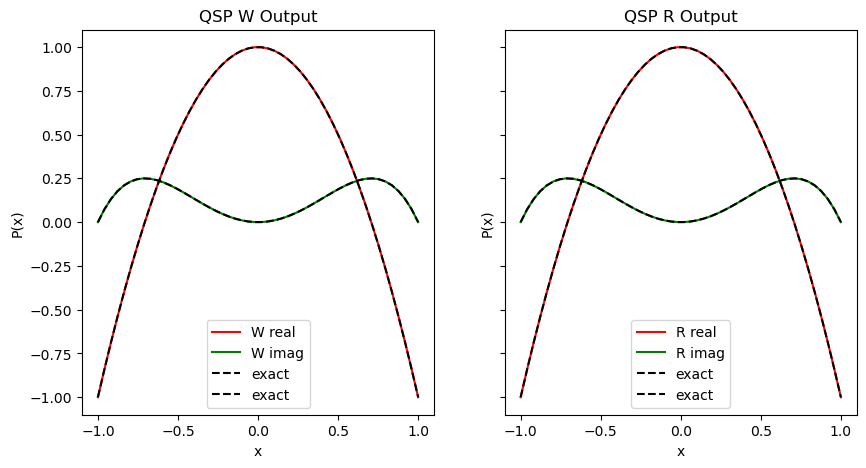

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True,figsize=(10,5))
ax1.plot(x_list,W_output.real,'-', color='red',label='W real')
ax1.plot(x_list,W_output.imag,'-', color='green',label='W imag')
ax1.plot(x_list,np.polynomial.Polynomial(P)(x_list).real,'--', color='black',label='exact')
ax1.plot(x_list,np.polynomial.Polynomial(P)(x_list).imag,'--', color='black',label='exact')
ax1.legend()
ax1.set_xlabel('x')
ax1.set_ylabel('P(x)')
ax1.set_title('QSP W Output')

ax2.plot(x_list,R_output.real,'-', color='red',label='R real')
ax2.plot(x_list,R_output.imag,'-', color='green',label='R imag')
ax2.plot(x_list,np.polynomial.Polynomial(P)(x_list).real,'--', color='black',label='exact')
ax2.plot(x_list,np.polynomial.Polynomial(P)(x_list).imag,'--', color='black',label='exact')
ax2.legend()
ax2.set_xlabel('x')
ax2.set_ylabel('P(x)')
ax2.set_title('QSP R Output')

In [9]:
l=[]
for i in range(100):
    k=np.random.randint(3,8)
    circ = random_circuit(k, 10)
    left_rank =np.random.randint(1,2**k+1)
    right_rank =np.random.randint(1,2**k+1)
    
    
    U =  Operator(circ.reverse_bits()).data
    A = U[0:left_rank,0:right_rank]
    
    l.append(np.linalg.norm(Operator(QSVTcircuit(new_angles,circ,left_rank,right_rank).reverse_bits()).data[0:right_rank,0:right_rank]-PolySV(P,A)))
print(f"Max Error: {np.max(l)}")

Max Error: 8.21595816921037e-14


In [10]:
'''Test Case 3. Odd Degree. Real Angles'''
P = [0,1,0,-5,0,4]

real_angles = getRealAngles(P)
new_real_angles = get_new_angles(real_angles)
exact_angles = getAngles(P)
new_exact_angles = get_new_angles(exact_angles)

In [11]:
x_list = np.linspace(-1,1)

W_real_output = []
W_exact_output = []
R_real_output = []
R_exact_output = []
for x in x_list:
    W_real_output.append(Operator(QSP_Wcircuit(real_angles,x)).data[0][0])
    W_exact_output.append(Operator(QSP_Wcircuit(exact_angles,x)).data[0][0])
    R_real_output.append(Operator(QSP_Rcircuit(new_real_angles,x)).data[0][0])
    R_exact_output.append(Operator(QSP_Rcircuit(new_exact_angles,x)).data[0][0])

W_real_output = np.array(W_real_output)
W_exact_output = np.array(W_exact_output)
R_real_output = np.array(R_real_output)
R_exact_output = np.array(R_exact_output)

Text(0.5, 1.0, 'QSP R Output (exact)')

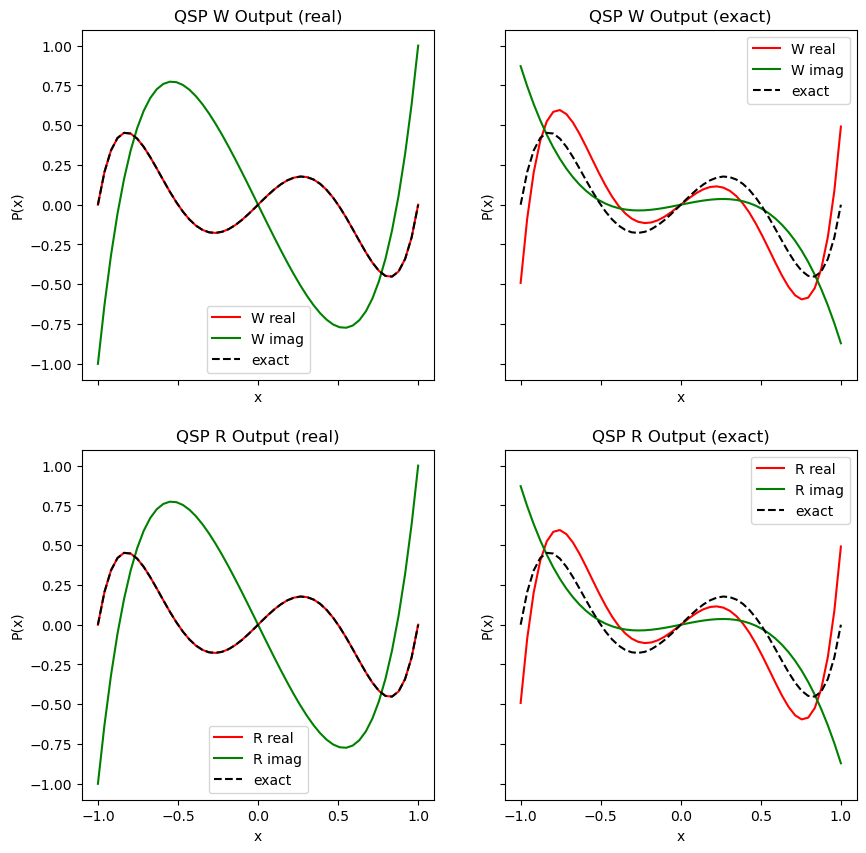

In [12]:
fig, (ax1, ax2) = plt.subplots(2, 2, sharex=True, sharey=True,figsize=(10,10))
ax1[0].plot(x_list,W_real_output.real,'-', color='red',label='W real')
ax1[0].plot(x_list,W_real_output.imag,'-', color='green',label='W imag')
ax1[0].plot(x_list,np.polynomial.Polynomial(P)(x_list).real,'--', color='black',label='exact')
ax1[0].legend()
ax1[0].set_xlabel('x')
ax1[0].set_ylabel('P(x)')
ax1[0].set_title('QSP W Output (real)')

ax1[1].plot(x_list,W_exact_output.real,'-', color='red',label='W real')
ax1[1].plot(x_list,W_exact_output.imag,'-', color='green',label='W imag')
ax1[1].plot(x_list,np.polynomial.Polynomial(P)(x_list).real,'--', color='black',label='exact')
ax1[1].legend()
ax1[1].set_xlabel('x')
ax1[1].set_ylabel('P(x)')
ax1[1].set_title('QSP W Output (exact)')

ax2[0].plot(x_list,R_real_output.real,'-', color='red',label='R real')
ax2[0].plot(x_list,R_real_output.imag,'-', color='green',label='R imag')
ax2[0].plot(x_list,np.polynomial.Polynomial(P)(x_list).real,'--', color='black',label='exact')
ax2[0].legend()
ax2[0].set_xlabel('x')
ax2[0].set_ylabel('P(x)')
ax2[0].set_title('QSP R Output (real)')

ax2[1].plot(x_list,R_exact_output.real,'-', color='red',label='R real')
ax2[1].plot(x_list,R_exact_output.imag,'-', color='green',label='R imag')
ax2[1].plot(x_list,np.polynomial.Polynomial(P)(x_list).real,'--', color='black',label='exact')
ax2[1].legend()
ax2[1].set_xlabel('x')
ax2[1].set_ylabel('P(x)')
ax2[1].set_title('QSP R Output (exact)')

In [13]:
l=[]
for i in range(100):
    k=np.random.randint(3,8)
    circ = random_circuit(k, 10)
    left_rank =np.random.randint(1,2**k+1)
    right_rank =np.random.randint(1,2**k+1)
    
    
    U =  Operator(circ.reverse_bits()).data
    A = U[0:left_rank,0:right_rank]
    
    l.append(np.linalg.norm(Operator(QSVTcircuit(new_exact_angles,circ,left_rank,right_rank).reverse_bits()).data[0:left_rank,0:right_rank]-PolySV(P,A)))
print(f"Max Error: {np.max(l)}")

Max Error: 10.007427228132617


In [14]:
l=[]
for i in range(100):
    k=np.random.randint(3,8)
    circ = random_circuit(k, 10)
    left_rank =np.random.randint(1,2**k+1)
    right_rank =np.random.randint(1,2**k+1)
    
    
    U =  Operator(circ.reverse_bits()).data
    A = U[0:left_rank,0:right_rank]
    
    l.append(np.linalg.norm(Operator(QSVTRealcircuit(new_real_angles,circ,left_rank,right_rank).reverse_bits()).data[0:left_rank,0:right_rank]-PolySV(P,A)))
print(f"Max Error: {np.max(l)}")

Max Error: 2.259556951397663e-05


In [15]:
'''Test Case 4. Even Degree. Real Angles'''
P = [0.5,0,-2,0,1,0,1.5]

real_angles = getRealAngles(P)
new_real_angles = get_new_angles(real_angles)
exact_angles = getAngles(P)
new_exact_angles = get_new_angles(exact_angles)

In [16]:
import matplotlib.pyplot as plt
x_list = np.linspace(-1,1)

W_real_output = []
W_exact_output = []
R_real_output = []
R_exact_output = []
for x in x_list:
    W_real_output.append(Operator(QSP_Wcircuit(real_angles,x)).data[0][0])
    W_exact_output.append(Operator(QSP_Wcircuit(exact_angles,x)).data[0][0])
    R_real_output.append(Operator(QSP_Rcircuit(new_real_angles,x)).data[0][0])
    R_exact_output.append(Operator(QSP_Rcircuit(new_exact_angles,x)).data[0][0])

W_real_output = np.array(W_real_output)
W_exact_output = np.array(W_exact_output)
R_real_output = np.array(R_real_output)
R_exact_output = np.array(R_exact_output)

Text(0.5, 1.0, 'QSP R Output (exact)')

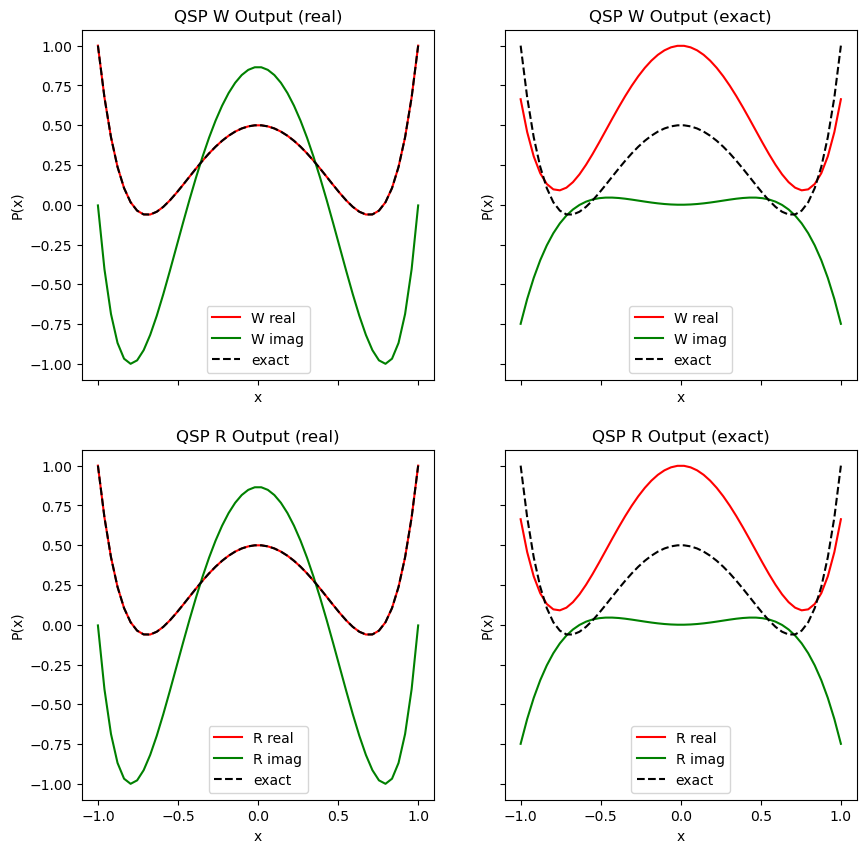

In [17]:
fig, (ax1, ax2) = plt.subplots(2, 2, sharex=True, sharey=True,figsize=(10,10))
ax1[0].plot(x_list,W_real_output.real,'-', color='red',label='W real')
ax1[0].plot(x_list,W_real_output.imag,'-', color='green',label='W imag')
ax1[0].plot(x_list,np.polynomial.Polynomial(P)(x_list).real,'--', color='black',label='exact')
ax1[0].legend()
ax1[0].set_xlabel('x')
ax1[0].set_ylabel('P(x)')
ax1[0].set_title('QSP W Output (real)')

ax1[1].plot(x_list,W_exact_output.real,'-', color='red',label='W real')
ax1[1].plot(x_list,W_exact_output.imag,'-', color='green',label='W imag')
ax1[1].plot(x_list,np.polynomial.Polynomial(P)(x_list).real,'--', color='black',label='exact')
ax1[1].legend()
ax1[1].set_xlabel('x')
ax1[1].set_ylabel('P(x)')
ax1[1].set_title('QSP W Output (exact)')

ax2[0].plot(x_list,R_real_output.real,'-', color='red',label='R real')
ax2[0].plot(x_list,R_real_output.imag,'-', color='green',label='R imag')
ax2[0].plot(x_list,np.polynomial.Polynomial(P)(x_list).real,'--', color='black',label='exact')
ax2[0].legend()
ax2[0].set_xlabel('x')
ax2[0].set_ylabel('P(x)')
ax2[0].set_title('QSP R Output (real)')

ax2[1].plot(x_list,R_exact_output.real,'-', color='red',label='R real')
ax2[1].plot(x_list,R_exact_output.imag,'-', color='green',label='R imag')
ax2[1].plot(x_list,np.polynomial.Polynomial(P)(x_list).real,'--', color='black',label='exact')
ax2[1].legend()
ax2[1].set_xlabel('x')
ax2[1].set_ylabel('P(x)')
ax2[1].set_title('QSP R Output (exact)')

In [18]:
from qiskit.circuit.random import random_circuit
l=[]
for i in range(100):
    k=np.random.randint(3,8)
    circ = random_circuit(k, 10)
    left_rank =np.random.randint(1,2**k+1)
    right_rank =np.random.randint(1,2**k+1)
    
    
    U =  Operator(circ.reverse_bits()).data
    A = U[0:left_rank,0:right_rank]
    
    l.append(np.linalg.norm(Operator(QSVTcircuit(new_exact_angles,circ,left_rank,right_rank).reverse_bits()).data[0:right_rank,0:right_rank]-PolySV(P,A)))
print(f"Max Error: {np.max(l)}")

Max Error: 7.275807384984553


In [19]:
l=[]
for i in range(100):
    k=np.random.randint(3,8)
    circ = random_circuit(k, 10)
    left_rank =np.random.randint(1,2**k+1)
    right_rank =np.random.randint(1,2**k+1)
    
    
    U =  Operator(circ.reverse_bits()).data
    A = U[0:left_rank,0:right_rank]
    
    l.append(np.linalg.norm(Operator(QSVTRealcircuit(new_real_angles,circ,left_rank,right_rank).reverse_bits()).data[0:right_rank,0:right_rank]-PolySV(P,A)))
print(f"Max Error: {np.max(l)}")

Max Error: 9.147487977176668e-05
